# Mass-multivariate analysis of 2D <span style="color:#b18bbb">landmark</span> data in <span style="color:#8476b5">Python</span>


**This notebook**...
* ... provides an overview of mass-multivariate, two-sample hypothesis testing of 2D landmark data in Python
* ... explains the details of script `contours_massmv_single.py` which appears in this repository
* ... is limited to mass-multivariate analysis (i.e., multivariate test statistics calculated at each point, with inference conducted in an omnibus sense over all points)
* ... is directed at novice Python users, who may be using Python for the first time.
* ... is likely not useful for intermediate or advanced Python users; please refer isntead to the scripts in `./lmfree2d/Python/`

**Dependencies** (alphabetical order):
* [lmfree2d](https://github.com/0todd0000/lmfree2d) &nbsp; &nbsp; (the `lmfree2d.py` module in this repository)
* [numpy](https://numpy.org)
* [scipy](https://scipy.org)
* [spm1d](http://www.spm1d.org)

___

## Install software

See the `contours_massmv` notebook for installation details.

Note that the **scipy** package is included by default with the Anaconda package.

___

## Prepare the workspace

Import all of the packages we'll need for this notebook.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import lmfree2d as lm

___

## Load data



In [2]:
dirREPO  = lm.get_repository_path()
name     = 'Bell'
fname    = os.path.join(dirREPO, 'Data', name, 'landmarks.csv')
r        = lm.read_landmarks_csv(fname)

print( r.shape )

(10, 8, 2)


The variable `r` is a (10 x 8 x 2) array that contains the contents of the `landmarks.csv` file. The three array dimensions represent:

* 10 : number of shapes
* 8 : number of landmarks
* 2 : number of point coordinates (XY)



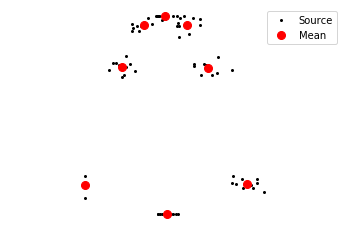

In [3]:
plt.figure()
ax = plt.axes()
lm.plot_registration(ax, r)
plt.show()

___

## Spatially align the landmarks

Landmarks can be registered (i.e., spatially aligned) using the `register_procrustes` function in **lmfree2d** as shown below.

**Note!**
* Landmarks are usually aligned using Generalized Procrustes Analysis (GPA).
* GPA can be easily conducted in R as demonstrated in the `landmarks_uv` notebook.
* GPA is an iterative Procrustes fitting process.
* The **lmfree2d** Procrustes alignment procedure in `register_procrustes` is equivalent to just a single iteration of GPA
* The `register_procrustes` function will achieve approximately the same results as GPA, but there may be cases where the results are qualitatively different.
* For general landmark analysis it is advisable to use GPA, and not `register_procrustes`


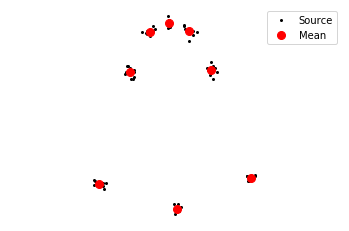

In [4]:
r_template = r[0]
r = lm.register_procrustes(r, r_template)

plt.figure()
ax = plt.axes()
lm.plot_registration(ax, r)
plt.show()


Note that individual landmark locations are now more tightly centered around the mean location.


___

## Conduct hypothesis test

Now that the landmarks are spatially registered, it is possible to conduct mass-multivariate hypothesis testing. Here we use [spm1d](https://spm1d.org) for this purpose. The goal will be to compare the mean shapes from two groups, where the first group consists of the first five shapes and the second group consists of the last five shapes.

A parametric two-sample test can be conducted as follows:

In [5]:
rA      = r[:5] # Group A
rB      = r[5:] # Group B

results = lm.two_sample_test(rA, rB, alpha=0.05, parametric=True)

print(results)


TwoSampleSPMResults
   npoints      = 8
   T2_max       = 10.224
----- Inference -----
   alpha        = 0.050
   T2_critical  = 26.107
   p            = 0.448



These results indicate a p value of 0.448, implying that there is insufficient evidence to reject the null hypothesis of equivalent group mean shapes.

A nonparametric version of the test can be conducted by setting the `parametric` keyword to `False`, and optionally also specifying the `iterations` keyword as indicated below. Setting `iterations` to `-1` will conduct all possible landmark permutations.

In [6]:
results = lm.two_sample_test(rA, rB, alpha=0.05, parametric=False, iterations=-1)

print(results)


TwoSampleSPMResults
   npoints      = 8
   T2_max       = 10.224
----- Inference -----
   alpha        = 0.050
   T2_critical  = 24.639
   p            = 0.317



Refer to the [spm1d documentation](https://spm1d.org/Documentation.html) and the `contours_massmv` notebook for further details.